In [72]:
#!pip install keras

In [73]:
#!pip install tensorflow

In [74]:
import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import warnings
warnings.filterwarnings('ignore')

In [75]:
(x_train,y_train),(x_test,y_test) =mnist.load_data()

In [76]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


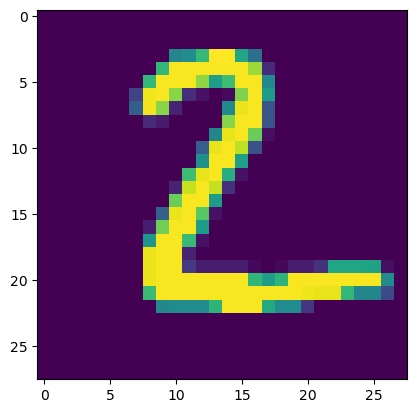

In [77]:
plt.imshow(x_test[1])

In [78]:
#### Pre_processing 
x_train= x_train.reshape(60000,784)
x_test= x_test.reshape(10000,784)
x_train.astype('float')
x_test.astype('float')
x_train= x_train/255
x_test= x_test/255

In [79]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [80]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [81]:
y_train[1]

np.uint8(0)

In [82]:
y_train= tf.keras.utils.to_categorical(y_train)
y_test= tf.keras.utils.to_categorical(y_test)

In [83]:
y_train[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [84]:
epochs=10
batch_size=1000
n_classes=10

#### Single layer network (Simple Perceptron)

In [85]:
simple_per= tf.keras.models.Sequential()

In [86]:
#### Model Building ( input layer ,output layer)
simple_per.add(tf.keras.layers.Dense(units=n_classes,activation='softmax',input_shape=[784]))

In [87]:
#### Model compilation
simple_per.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [88]:
#### Model Training and validation
history=simple_per.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(x_test,y_test))

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.6506 - loss: 1.4112 - val_accuracy: 0.8198 - val_loss: 0.8684
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8370 - loss: 0.7320 - val_accuracy: 0.8617 - val_loss: 0.5963
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8655 - loss: 0.5625 - val_accuracy: 0.8808 - val_loss: 0.4936
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8797 - loss: 0.4838 - val_accuracy: 0.8939 - val_loss: 0.4360
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8884 - loss: 0.4373 - val_accuracy: 0.8993 - val_loss: 0.4012
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8944 - loss: 0.4065 - val_accuracy: 0.9039 - val_loss: 0.3760
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8992 - loss: 0.3840 - val_accuracy: 0.9064 - val_loss: 0.3580
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9031 - loss: 0.3669 - val_accuracy: 0.9083 - v

In [89]:
val_loss,val_acc=simple_per.evaluate(x_test,y_test)
print('val_loss:',val_loss,',','val_acc:',val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9114 - loss: 0.3251
val_loss: 0.3251374065876007 , val_acc: 0.9114000201225281


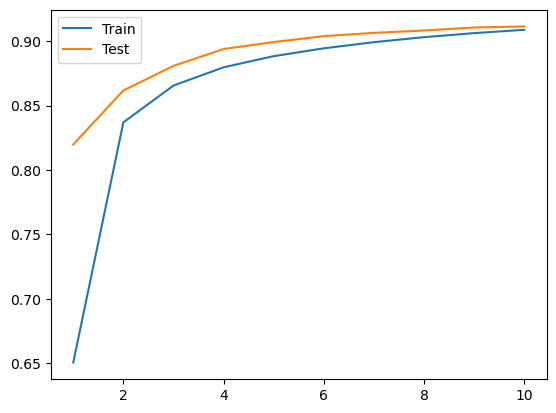

In [90]:
plt.plot(range(1,11),history.history['accuracy'],label=['Train'])
plt.plot(range(1,11) ,history.history['val_accuracy'],label=['Test'])
plt.legend()

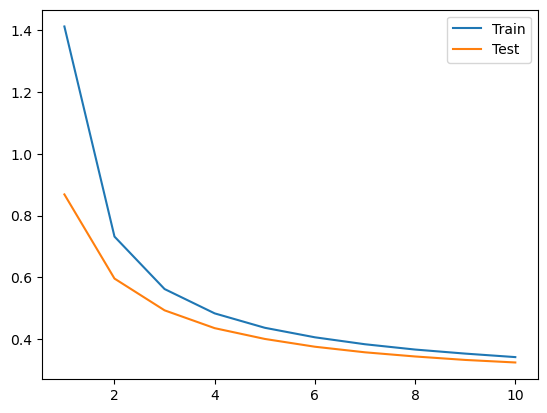

In [91]:
plt.plot(range(1,11),history.history['loss'],label=['Train'])
plt.plot(range(1,11) ,history.history['val_loss'],label=['Test'])
plt.legend()

#### Multi_layer_Network (ANN)

In [92]:
ann= tf.keras.models.Sequential()

In [93]:
784*2/3+10

532.6666666666666

In [94]:
#### Input layer,First hidden layer
ann.add(tf.keras.layers.Dense(units=540,activation='relu',input_shape=[784]))
ann.add(tf.keras.layers.Dropout(0.1))

In [95]:
540*2/3+10

370.0

In [96]:
#### Second hidden layer
ann.add(tf.keras.layers.Dense(units=370,activation='relu'))
ann.add(tf.keras.layers.Dropout(0.1))

In [97]:
### output layers
ann.add(tf.keras.layers.Dense(units=n_classes,activation='softmax'))

In [98]:
#### Model compilation
ann.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [99]:
#### Model Training and validation
history=ann.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(x_test,y_test))

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - accuracy: 0.8662 - loss: 0.4801 - val_accuracy: 0.9434 - val_loss: 0.1917
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9516 - loss: 0.1673 - val_accuracy: 0.9629 - val_loss: 0.1251
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.9672 - loss: 0.1137 - val_accuracy: 0.9691 - val_loss: 0.0989
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.9746 - loss: 0.0836 - val_accuracy: 0.9752 - val_loss: 0.0811
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.9809 - loss: 0.0635 - val_accuracy: 0.9773 - val_loss: 0.0740
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9844 - loss: 0.0528 - val_accuracy: 0.9792 - val_loss: 0.0690
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.9874 - loss: 0.0422 - val_accuracy: 0.9807 - val_loss: 0.0653
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.9901 - loss: 0.0335 - val_accuracy: 0.9791 - v

In [100]:
val_loss,val_acc=ann.evaluate(x_test,y_test)
print('val_loss:',val_loss,',','val_acc:',val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9814 - loss: 0.0610
val_loss: 0.06103489547967911 , val_acc: 0.9814000129699707


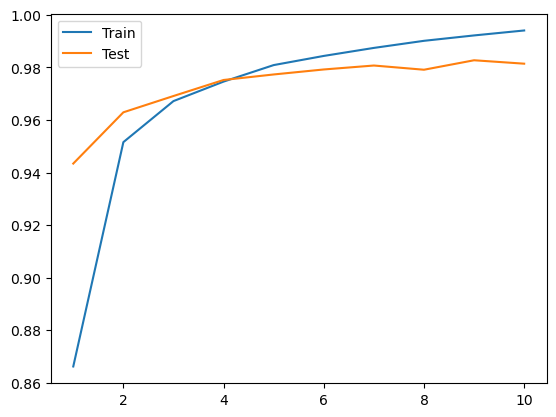

In [101]:
plt.plot(range(1,11),history.history['accuracy'],label=['Train'])
plt.plot(range(1,11) ,history.history['val_accuracy'],label=['Test'])
plt.legend()

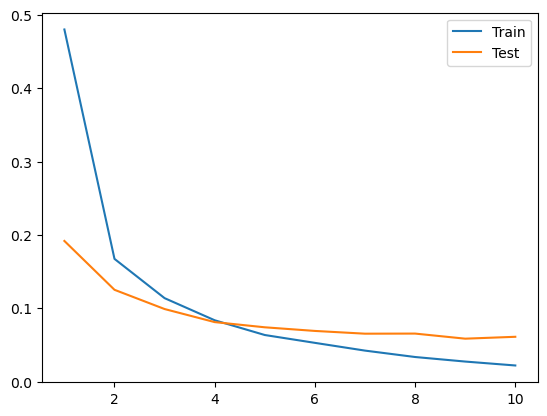

In [102]:
plt.plot(range(1,11),history.history['loss'],label=['Train'])
plt.plot(range(1,11) ,history.history['val_loss'],label=['Test'])
plt.legend()

In [114]:
np.argmax(y_test[25])

np.int64(0)

In [117]:
len(y_test)

10000

In [110]:
y_test[20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [111]:
y_pred=ann.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [115]:
np.argmax(y_pred[25])

np.int64(0)

In [118]:
pred=[]
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
print(pred)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [116]:
act=[]
for i in range(len(y_test)):
    act.append(np.argmax(y_test[i]))
print(act)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [119]:
from sklearn.metrics import classification_report

In [120]:
print(classification_report(act,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

